# Phase Kickback

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from BoredQiskit import FastQiskit as fq

## Phase kickback
È un fenomeno che avviene sotto circostanze particolari, per cui le operazioni controllate non influenzano (solo) il qubit target, ma anche il qubit di controllo. È il concetto alla base degli oracoli di fase.

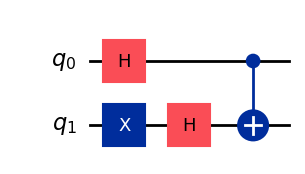

In [3]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.h(1)
sv_1 = Statevector(qc).data
qc.cx(0,1)
sv_2 = Statevector(qc).data
qc.draw('mpl')

In [4]:
print("Prima del phase kickback: ", sv_1)
print("Dopo il phase kickback  : ", sv_2)

Prima del phase kickback:  [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
Dopo il phase kickback  :  [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]


$$
CNOT|+-\rangle = CNOT\frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle) 
$$
$$
= \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) 
$$

$$
= \frac{1}{2}(|0\rangle(|0\rangle - |1\rangle) - |1\rangle(|0\rangle - |1\rangle))
$$
$$
= \frac{1}{2}(|0\rangle - |1\rangle)(|0\rangle - |1\rangle) = |--\rangle
$$

## La fase è cambiata!
Dimostriamo ciò applicando di nuovo Hadamard sul $q_0$. Se la fase non fosse effettivamente cambiata, l'output sarebbe

$$
H|+\rangle = |0\rangle
$$

Dato che la fase è cambiata, il risultato ottenuto è: 
$$
H|-\rangle = |1\rangle
$$

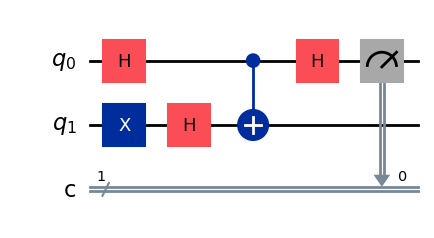

In [15]:
qc = QuantumCircuit(2,1)

qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

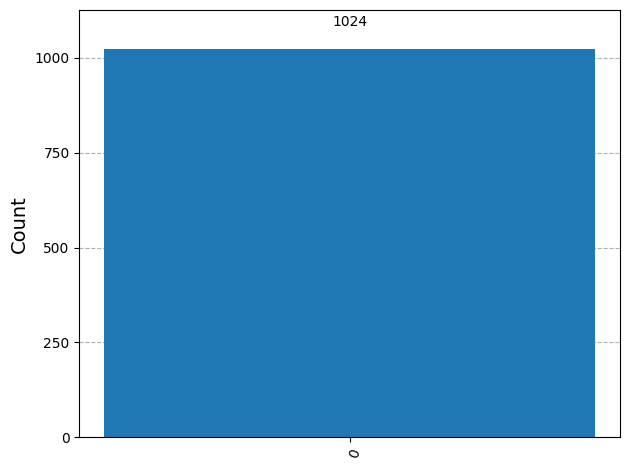

In [14]:
counts = fq.run(qc)
plot_histogram(counts)